# **Data Transformation**

## **Scale, Standardize, and Normalize**

Scaling involves changing the range of your data, so that it fits within a specific scale, like 0-100 or 0-1. Some ML algorithms, such as support vector machines (SVM), k-nearest neighbors (KNN), or k-means, are based on measures of how far apart data points are (i.e. distances between data points), so a change of "1" in any numeric feature is given the same importance. Therefore, variables/attributes with larger value ranges will outweigh variables with smaller ranges and will distort the distance computations for these methods.

For example, you might be looking at the prices of some products in both EGP and US Dollars. One US Dollar is worth about 17 EGP, but if you don't scale your prices, methods like SVM or KNN will consider a difference in price of 1 EGP as important as a difference of 1 US Dollar! With currency, you can convert between currencies. But what about if you're looking at something like height and weight? Or age and salary? It's not entirely clear how many pounds should equal one inch (or much money equals one year of age). By scaling your variables, you can help compare different variables on equal footing.

Standardization, or z-score normalization, involves changing the range of your data based on the mean and standard deviation. The attribute will have a mean of zero and variance of 1.

Normalization involves changing the shape of the distribution of your data. You change your observations so that they can be described as a normal distribution. Normalize your data if you're going to use an ML technique that assumes your data is normally distributed, such as linear regression, linear discriminant analysis (LDA), or Gaussian naive Bayes.

**Important Notes (taken from Kaggle)**


Scaling your data is a very crucial procedure in most ML algorithms.

Scaling is used to make all features contribute the same amount in prediction. Refer to the weight and height, salary and age examples above.
Scaling makes the algorithms converge faster since it transform the variable space in to a much smaller range.

When it is time to work on training and test datasets, you must apply scaling separately on train and test sets in order to correctly represent the distribution of the variables in each set.


## **The Kickstarter Campaign Dataset**



Let's experiment with these preprocessing tasks on a dataset. The dataset we will use is the Kickstarter Campaign dataset. Kickstarter is an online crowdfunding platform aimed at helping people get their ideas funded while building a community of fans to support their ideas. While Kickstarter publishes many advice and best-practices articles on their blog, over half of campaigns still fail.

This dataset contains data on 20,632 Kickstarter campaigns on the site as of February 1st 2017. Download the dataset from this link on Kaggle. Important attributes are described below:

-  **project**: a finite work with a clear goal that you’d like to bring to life (aka campaign)
-  **funding goal**: amount of money that a creator needs to complete their project
-  **name**: name of project on Kickstarter
-  **blurb**: the short description displayed under the name of your project and on the browse page
-  **pledged**: amount of money that a project has raised
-  **backers**: number of people that have supported the project at the point of the API pull
-  **state**: successful, failed, cancelled, live or suspended
-  **deadline**: deadline given for successful funding
-  **state changed**: state changed when campaign went to success or failure
-  **created at**: time the project was created at
-  **launched at**: time the project was launched at
-  **usd_pledged**: conversion in US dollars of the pledged column (conversion done by kickstarter).
-  **usd_pledge_real**: conversion in US dollars of the pledged column (conversion from Fixer.io API).
-  **usd_goal_real**: conversion in US dollars of the goal column (conversion from Fixer.io API).
-  Other attributes in this dataset: **country**, **currency**, category

You can download the dataset from Kaggle. You can find it using the following link: https://www.kaggle.com/kemical/kickstarter-projects You will find two CSV files, in the notebook we used the ks-projects-201801.csv file.

Let's begin by some routine imports and data loading:



In [ ]:

# Modules we'll use
import pandas as pd
import numpy as np

# For min_max scaling
from sklearn.preprocessing import MinMaxScaler

# For z-score scaling
from sklearn.preprocessing import StandardScaler

# For Box-Cox Normalization
from scipy import stats

# Plotting modules
from pandas.plotting import scatter_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# Read in all our data
kickstarters_2018 = pd.read_csv("ks-projects-201801.csv")

# Set seed for reproducibility
np.random.seed(0)

# Inspect the first couple of rows
kickstarters_2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


**Scaling one attribute**

Now we proceed to scale one attribute, the **goal** attribute. We will use the MinMaxScaler() method to perform min-max scaling. We will illustrate the difference in scale by distribution plots.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled data')

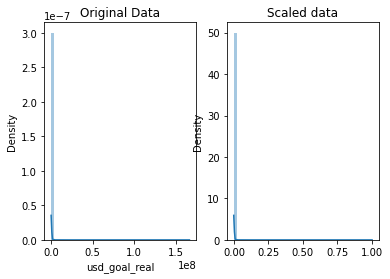

In [ ]:
# For min_max scaling
from sklearn.preprocessing import MinMaxScaler

# Select the usd_goal_real column
usd_goal_original = kickstarters_2018.usd_goal_real 

# Scale the goals from 0 to 1 using MinMaxScaler()
# fit computes the minimum and maximum to be used for later scaling, and transform performs the scaling
usd_goal_scaled = MinMaxScaler().fit_transform(kickstarters_2018[["usd_goal_real"]]) 
# MinMaxScaler does not accept Series and needs a DataFrame object. 
# A DataFrame is a 2-d array, with potential multiple columns
# In this case, we have to use kickstarters_2018[["goal"]] and NOT kickstarters_2017["goal"] or kickstarters_2017.goal
# Because kickstarters_2018["goal"] results in a Series - a 1-d array that is practically one row with all the values
# while kickstarters_2018[["goal"]] results in a DataFrame - a 2-d array with multiple row and one column, which is what MinMaxScaler() needs

# Plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(usd_goal_original, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(usd_goal_scaled, ax=ax[1])
ax[1].set_title("Scaled data")


Let's try a different scaling method; the StandardScaler(). This is the z-score scaling, which will scale the attribute values with zero mean and unit standard deviation.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Scaled data - z-score')

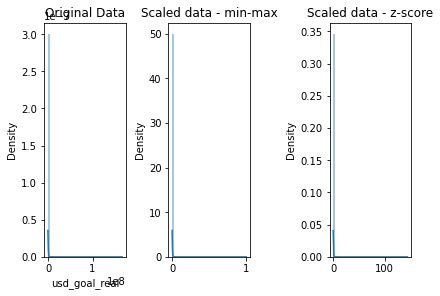

In [ ]:
# Scale the usd_goals_real using mean and SD
usd_goal_z_scaled = StandardScaler().fit_transform(kickstarters_2018[["usd_goal_real"]]) 

# Plot the original & scaled data with both methods to compare
fig, ax=plt.subplots(1,3, constrained_layout=True) # layout spaces out the figures for more visibility
sns.distplot(usd_goal_original, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(usd_goal_scaled, ax=ax[1])
ax[1].set_title("Scaled data - min-max")
sns.distplot(usd_goal_z_scaled, ax=ax[2])
ax[2].set_title("Scaled data - z-score")


**Normalization**

Now let's try normalizing the **pledged** attribute using the Box-Cox normalization method.

The Box-Cox normalization transforms a non-normal attribute into an attribute with normal distribution. The Box-Cox transformation is a formula that has an exponent, lambda λ, which varies from -5 to 5. All values of λ are considered by the transformation function and the optimal value for your data is selected. The “optimal value” is the one which results in the best approximation of a normal distribution curve.

This transformation only works when the attributes holds only positive values. If you have an attribute with negative values and you want to fit it to the normal distribution, you may want to consider shifting the range to start from zero by adding a constant to all the attribute values.

Let's now investigate how the Box-Cox transformation works. We are still using the Kickstarter Campaign dataset.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

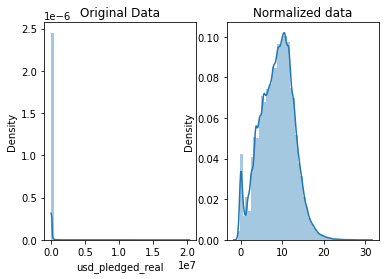

In [ ]:
# Get the index of all positive pledges (Box-Cox only takes postive values)
index_of_positive_pledges = kickstarters_2018.usd_pledged_real > 0

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2018.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

## **The Adult Income Dataset**


The Adult Income Dataset includes data about an individual’s annual income. Intuitively, income is influenced by the individual’s education level, age, gender, occupation, and etc. The dataset contains 14 columns detailing attributes related to the demographics and other features that describe a person. The target attribute, Income, is divide into two classes: <=50K and >50K. A description of the attributes follows:

-  **age**: continuous.
-  **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
-  **fnlwgt**: continuous.
-  **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
-  **education-num**: continuous.
-  **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
-  **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
-  **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
-  **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
-  **gender**: Female, Male.
-  **capital-gain**: continuous.
-  **capital-loss**: continuous.
-  **hours-per-week**: continuous.
-  **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
-  income: >50K, <=50K



You can find the dataset here: https://raw.githubusercontent.com/raneemsultan/DataEngineering-CSEN1095/main/Lab6/CSVs/adult.csv

Let's import some important modules and then import the data.



In [ ]:
import numpy as np
import pandas as pd
import sklearn.preprocessing as preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

income_df = pd.read_csv("https://raw.githubusercontent.com/raneemsultan/DataEngineering-CSEN1095/main/Lab6/CSVs/adult.csv")

# List attribute names
print (list(income_df))

# Display the shape of the dataset (#rows, #columns)
print (income_df.shape)

['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
(48842, 15)


You may want to inspect some records from the dataset to get a feel of the values.



In [ ]:
#income_df.head() # first 5 rows
income_df.sample(10) # random 10 rows

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
38113,36,Private,65624,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K
39214,57,Self-emp-inc,37345,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,36,United-States,>50K
44248,49,Private,287647,Masters,14,Divorced,Sales,Not-in-family,White,Male,4787,0,45,United-States,>50K
10283,54,Self-emp-not-inc,183668,5th-6th,3,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,55,United-States,<=50K
26724,17,Self-emp-not-inc,228786,10th,6,Never-married,Other-service,Own-child,White,Female,0,0,24,United-States,<=50K
20996,22,Private,24008,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K
44337,63,Private,158199,1st-4th,2,Widowed,Machine-op-inspct,Unmarried,White,Female,0,0,44,Portugal,<=50K
33771,69,Private,124930,5th-6th,3,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,2267,40,United-States,<=50K
24651,56,Self-emp-inc,35723,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,>50K
36398,62,Self-emp-not-inc,158712,HS-grad,9,Never-married,Other-service,Unmarried,White,Female,0,0,6,United-States,<=50K


A description of each attribute helps us understand the distribution of its values.



In [ ]:
income_df.describe()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Let's investigate descriptions of individual attributes.




In [ ]:
def summerize_data(df):
    for column in df.columns:
        print (column)
        if df.dtypes[column] == np.object: # Categorical data
            print (df[column].value_counts())
        else:
            print (df[column].describe()) 
            
        print ('\n')
    
summerize_data(income_df)

age
count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


fnlwgt
count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64


education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6t


## **Label Encoding:**

We can encode categorical attributes as numbers without expanding. This involves assigning a numeric code for each category in a categorical attribute, or Label Encoding.

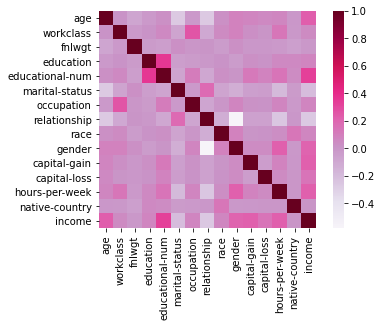

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
48838,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
48839,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
48840,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0
48841,52,5,287927,11,9,2,4,5,4,0,15024,0,40,39,1


In [ ]:
# Function to encode categorical attributes in a given dataset as numbers
def number_encode_features(df):
    result = df.copy() # take a copy of the dataframe
    for column in result.columns:
        if result.dtypes[column] == np.object: # if attribute is categorical
            # Apply LabelEncoder method to attribute
            # fit will infer the number of numerical values needed by counting the number of categories
            # then transform will replace each category with its numerical counterpart
            result[column] = preprocessing.LabelEncoder().fit_transform(result[column])
    return result

# Apply function defined above to income dataset
encoded_data = number_encode_features(income_df)
# Now that the attributes are numerical, it is possible to calculate correlation and plot it
sns.heatmap(encoded_data.corr(), square=True, cmap='PuRd')
plt.show()

# Display last 5 records in transformed dataset to verify numerical transformation
encoded_data.tail(5)

Note that label encoding induces a new problem since it uses number sequencing. The problem using the number is that they introduce relation/comparison between them. Let’s consider another column named ‘Safety Level’ that has the values none < low < medium < high < very high. Performing label encoding of this column also induces order/precedence in number, but in the right way. Here the numerical order does not look out-of-box and it makes sense if the algorithm interprets safety order 0 < 1 < 2 < 3 < 4 i.e. none < low < medium < high < very high.

**One-hot Encoding**

Now let's try one-hot encoding.

The reason one-hot encoding may be needed and useful is when specific values in a categorical attribute may be correlated with specific objects with certain traits. For example, if you investigate the correlation between the gender and relationship attributes, you may find that "female" and "wife" are correlated, and "male" and "husband", but not gender and relationshiop as a whole.

In [ ]:
# Try one hot encoding

# Copy the original data
encoded_income_df = income_df.copy()

# Select the numeric columns
numeric_subset = income_df.select_dtypes('number')
# Select the categorical columns
categorical_subset = income_df.select_dtypes('object')

# One hot encode
# pandas has a handy method to apply one-hot encoding --
# takes a categorical attributes and defines indicator "dummy" attributes
# We will not one-hot encode the income attribute, since it is the response attribute that is the target of analysis
new_categorical_subset = pd.get_dummies(categorical_subset[categorical_subset.columns.drop("income")])

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
encoded_income_df = pd.concat([numeric_subset, new_categorical_subset], axis = 1)
encoded_income_df

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_?,occupation_Adm-clerical,...,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,0,0,20,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Though this approach eliminates the hierarchy/order issues but does have the downside of adding more columns to the data set. It can cause the number of columns to expand greatly if you have many unique values in a category column so it will get really challenging to manage when encoding gives many columns.

## **Discretization**

Now let's discretize some of the numerical attributes. We will work with the **age** and the hours-per-week as examples.

In [ ]:
age_group = [] # define array structure
for age in encoded_data["age"]:
    if age < 25:
        age_group.append("<25")
    elif 25 <= age <= 34:
        age_group.append("25-34")
    elif 34 < age <= 44:
        age_group.append("35-44")
    elif 44 < age <= 54:
        age_group.append("45-54")
    elif 54 < age <= 65:
        age_group.append("55-64")
    else:
        age_group.append("65 and over")
        
# Copy dataframe to keep original 
new_income_df = encoded_data.copy()
new_income_df["age_group"] = age_group
del new_income_df["age"]

# Same thing for "hours-per-week"
work_hours_per_week = []
for hours in encoded_data["hours-per-week"]:
    if hours < 16:
        work_hours_per_week.append("<16")
    elif 16 <= hours <= 32:
        work_hours_per_week.append("16-32")
    elif 32 < hours <= 48:
        work_hours_per_week.append("32-48")
    elif 48 < hours <= 60:
        work_hours_per_week.append("48-60")
    else:
        work_hours_per_week.append("60 and over")
        
new_income_df["work_hours_per_week"] = work_hours_per_week
del new_income_df["hours-per-week"]

new_income_df.head(10)

,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,native-country,income,age_group,work_hours_per_week
0,4,226802,1,7,4,7,3,2,1,0,0,39,0,25-34,32-48
1,4,89814,11,9,2,5,0,4,1,0,0,39,0,35-44,48-60
2,2,336951,7,12,2,11,0,4,1,0,0,39,1,25-34,32-48
3,4,160323,15,10,2,7,0,2,1,7688,0,39,1,35-44,32-48
4,0,103497,15,10,4,0,3,4,0,0,0,39,0,<25,16-32
5,4,198693,0,6,4,8,1,4,1,0,0,39,0,25-34,16-32
6,0,227026,11,9,4,0,4,2,1,0,0,39,0,25-34,32-48
7,6,104626,14,15,2,10,0,4,1,3103,0,39,1,55-64,16-32
8,4,369667,15,10,4,8,4,4,0,0,0,39,0,<25,32-48
9,4,104996,5,4,2,3,0,4,1,0,0,39,0,55-64,<16


There is an easier way in python than using if else statements. Pandas cut function can be used to group continuous or countable data in to bins.

In [ ]:
# Take another copy of the original dataset
new_income_df2 = encoded_data.copy()

# Cut the age attribute into intervals
#age_group2 = pd.cut(new_income_df2.age, [20,40,60,80])

# You can label the intervals for more meaningful representation
age_group2 = pd.cut(new_income_df2.age, [20,40,60,80],labels=['young','middle-aged','old'])

new_income_df2["age_group"] = age_group2
del new_income_df2["age"]

new_income_df2.head(10)

,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,age_group
0,4,226802,1,7,4,7,3,2,1,0,0,40,39,0,young
1,4,89814,11,9,2,5,0,4,1,0,0,50,39,0,young
2,2,336951,7,12,2,11,0,4,1,0,0,40,39,1,young
3,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1,middle-aged
4,0,103497,15,10,4,0,3,4,0,0,0,30,39,0,NaN
5,4,198693,0,6,4,8,1,4,1,0,0,30,39,0,young
6,0,227026,11,9,4,0,4,2,1,0,0,40,39,0,young
7,6,104626,14,15,2,10,0,4,1,3103,0,32,39,1,old
8,4,369667,15,10,4,8,4,4,0,0,0,40,39,0,young
9,4,104996,5,4,2,3,0,4,1,0,0,10,39,0,middle-aged


#References

https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

https://github.com/mervatkheir/CSEN1095-Data-Engineering/blob/master/Practice5%20-%20Outliers%20and%20Transformations.ipynb

https://www.kaggle.com/getting-started/52652
